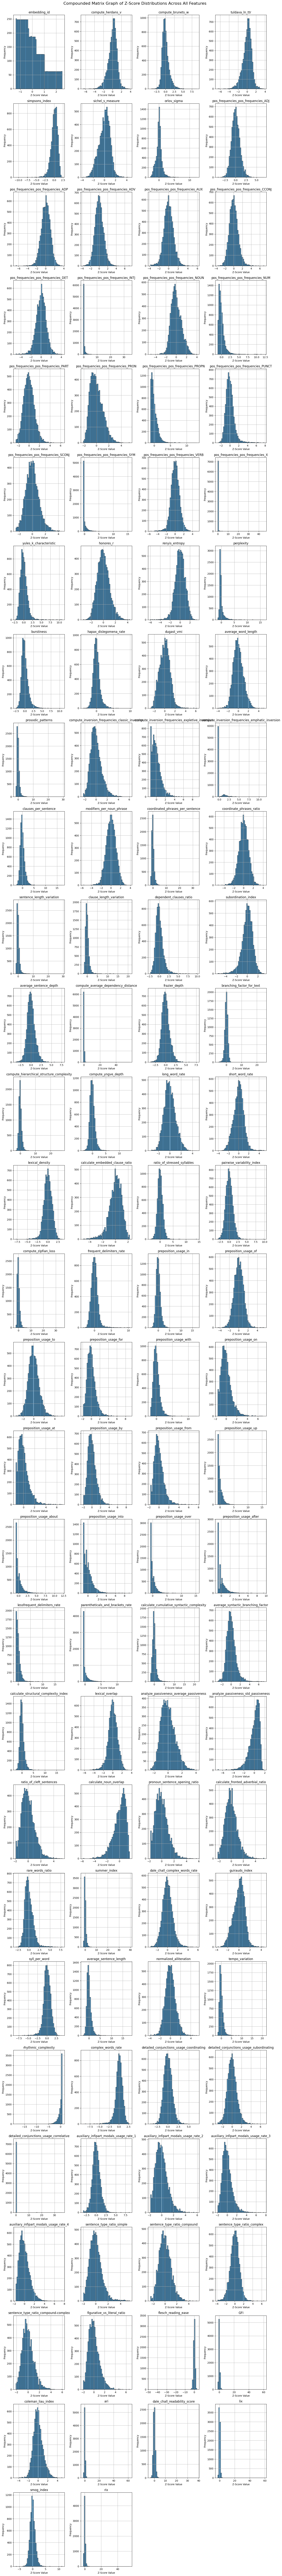

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

file1 = pd.read_csv('ABB_30_embeddings.csv')
file2 = pd.read_csv('ABB_70_embeddings.csv')
file3 = pd.read_csv('AGG_30_embeddings.csv')
file4 = pd.read_csv('AGG_70_embeddings.csv')

sample_counts = {
    'ABB_30_embeddings.csv': len(file1),
    'ABB_70_embeddings.csv': len(file2),
    'AGG_30_embeddings.csv': len(file3),
    'AGG_70_embeddings.csv': len(file4)
}

combined_df = pd.concat([file1, file2, file3, file4])
numeric_columns = combined_df.select_dtypes(include='number').columns

filtered_columns = [col for col in numeric_columns if not np.all(combined_df[col] == 0)]

zscore_df = combined_df.copy()
zscore_df[filtered_columns] = zscore_df[filtered_columns].apply(lambda x: (x - x.mean()) / x.std(), axis=0)
num_plots = len(filtered_columns)
cols = 4 
rows = (num_plots // cols) + int(num_plots % cols > 0)

plt.figure(figsize=(15, 5 * rows))

plt.suptitle('Compounded Matrix Graph of Z-Score Distributions Across All Features', fontsize=16)
# info_text = f"Number of Samples:\nABB_30: {sample_counts['ABB_30_embeddings.csv']}, " \
#             f"ABB_70: {sample_counts['ABB_70_embeddings.csv']}, " \
#             f"AGG_30: {sample_counts['AGG_30_embeddings.csv']}, " \
#             f"AGG_70: {sample_counts['AGG_70_embeddings.csv']}"
# plt.figtext(0.5, 0.95, info_text, ha='center', fontsize=12)

for i, col in enumerate(filtered_columns, start=1):
    plt.subplot(rows, cols, i)
    plt.hist(zscore_df[col], bins=50, alpha=0.75, edgecolor='black')
    plt.title(f'{col}')
    plt.xlabel('Z-Score Value')
    plt.ylabel('Frequency')
    plt.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.98]) 
plt.savefig('zscore_distributions_with_info.png', dpi=300, bbox_inches='tight')
plt.show()
